# 1.0 Importing libraries and making initial configurations

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.style as style
import seaborn as sns
import opendatasets as od
from matplotlib import pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
# Reading the datasets

train = pd.read_csv('train.csv')
stores = pd.read_csv('stores.csv')
features = pd.read_csv('features.csv')
test = pd.read_csv('test.csv')

In [3]:
train.describe()

Store           Dept   Weekly_Sales
count  421570.000000  421570.000000  421570.000000
mean       22.200546      44.260317   15981.258123
std        12.785297      30.492054   22711.183519
min         1.000000       1.000000   -4988.940000
25%        11.000000      18.000000    2079.650000
50%        22.000000      37.000000    7612.030000
75%        33.000000      74.000000   20205.852500
max        45.000000      99.000000  693099.360000

In [4]:
test.describe()

Store           Dept
count  115064.000000  115064.000000
mean       22.238207      44.339524
std        12.809930      30.656410
min         1.000000       1.000000
25%        11.000000      18.000000
50%        22.000000      37.000000
75%        33.000000      74.000000
max        45.000000      99.000000

In [5]:
train

Store  Dept        Date  Weekly_Sales  IsHoliday
0           1     1  2010-02-05      24924.50      False
1           1     1  2010-02-12      46039.49       True
2           1     1  2010-02-19      41595.55      False
3           1     1  2010-02-26      19403.54      False
4           1     1  2010-03-05      21827.90      False
...       ...   ...         ...           ...        ...
421565     45    98  2012-09-28        508.37      False
421566     45    98  2012-10-05        628.10      False
421567     45    98  2012-10-12       1061.02      False
421568     45    98  2012-10-19        760.01      False
421569     45    98  2012-10-26       1076.80      False

[421570 rows x 5 columns]

In [6]:
test

Store  Dept        Date  IsHoliday
0           1     1  2012-11-02      False
1           1     1  2012-11-09      False
2           1     1  2012-11-16      False
3           1     1  2012-11-23       True
4           1     1  2012-11-30      False
...       ...   ...         ...        ...
115059     45    98  2013-06-28      False
115060     45    98  2013-07-05      False
115061     45    98  2013-07-12      False
115062     45    98  2013-07-19      False
115063     45    98  2013-07-26      False

[115064 rows x 4 columns]

In [7]:
stores

Store Type    Size
0       1    A  151315
1       2    A  202307
2       3    B   37392
3       4    A  205863
4       5    B   34875
5       6    A  202505
6       7    B   70713
7       8    A  155078
8       9    B  125833
9      10    B  126512
10     11    A  207499
11     12    B  112238
12     13    A  219622
13     14    A  200898
14     15    B  123737
15     16    B   57197
16     17    B   93188
17     18    B  120653
18     19    A  203819
19     20    A  203742
20     21    B  140167
21     22    B  119557
22     23    B  114533
23     24    A  203819
24     25    B  128107
25     26    A  152513
26     27    A  204184
27     28    A  206302
28     29    B   93638
29     30    C   42988
30     31    A  203750
31     32    A  203007
32     33    A   39690
33     34    A  158114
34     35    B  103681
35     36    A   39910
36     37    C   39910
37     38    C   39690
38     39    A  184109
39     40    A  155083
40     41    A  196321
41     42    C   39690
42     43    C   41062
43     44    C   39910
44     45    B  118221

In [8]:
features

Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0         1  2010-02-05        42.31       2.572        NaN        NaN   
1         1  2010-02-12        38.51       2.548        NaN        NaN   
2         1  2010-02-19        39.93       2.514        NaN        NaN   
3         1  2010-02-26        46.63       2.561        NaN        NaN   
4         1  2010-03-05        46.50       2.625        NaN        NaN   
...     ...         ...          ...         ...        ...        ...   
8185     45  2013-06-28        76.05       3.639    4842.29     975.03   
8186     45  2013-07-05        77.50       3.614    9090.48    2268.58   
8187     45  2013-07-12        79.37       3.614    3789.94    1827.31   
8188     45  2013-07-19        82.84       3.737    2961.49    1047.07   
8189     45  2013-07-26        76.06       3.804     212.02     851.73   

      MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0           NaN        NaN        NaN  211.096358         8.106      False  
1           NaN        NaN        NaN  211.242170         8.106       True  
2           NaN        NaN        NaN  211.289143         8.106      False  
3           NaN        NaN        NaN  211.319643         8.106      False  
4           NaN        NaN        NaN  211.350143         8.106      False  
...         ...        ...        ...         ...           ...        ...  
8185       3.00    2449.97    3169.69         NaN           NaN      False  
8186     582.74    5797.47    1514.93         NaN           NaN      False  
8187      85.72     744.84    2150.36         NaN           NaN      False  
8188     204.19     363.00    1059.46         NaN           NaN      False  
8189       2.06      10.88    1864.57         NaN           NaN      False  

[8190 rows x 12 columns]

In [9]:
features.describe()

Store  Temperature   Fuel_Price      MarkDown1      MarkDown2  \
count  8190.000000  8190.000000  8190.000000    4032.000000    2921.000000   
mean     23.000000    59.356198     3.405992    7032.371786    3384.176594   
std      12.987966    18.678607     0.431337    9262.747448    8793.583016   
min       1.000000    -7.290000     2.472000   -2781.450000    -265.760000   
25%      12.000000    45.902500     3.041000    1577.532500      68.880000   
50%      23.000000    60.710000     3.513000    4743.580000     364.570000   
75%      34.000000    73.880000     3.743000    8923.310000    2153.350000   
max      45.000000   101.950000     4.468000  103184.980000  104519.540000   

           MarkDown3     MarkDown4      MarkDown5          CPI  Unemployment  
count    3613.000000   3464.000000    4050.000000  7605.000000   7605.000000  
mean     1760.100180   3292.935886    4132.216422   172.460809      7.826821  
std     11276.462208   6792.329861   13086.690278    39.738346      1.877259  
min      -179.260000      0.220000    -185.170000   126.064000      3.684000  
25%         6.600000    304.687500    1440.827500   132.364839      6.634000  
50%        36.260000   1176.425000    2727.135000   182.764003      7.806000  
75%       163.150000   3310.007500    4832.555000   213.932412      8.567000  
max    149483.310000  67474.850000  771448.100000   228.976456     14.313000

In [10]:
# Joining train/test datasets with features/stores datasets

mg_train = train.merge(stores, how='left').merge(features,
how='left')

mg_test = test.merge(stores, how='left').merge(features,
how='left')

In [11]:
# Extracting week from the date column

def find_week(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df.Date.dt.year
    df['Week'] = (df.Date.dt.isocalendar().week) * 1.0

find_week(mg_train)
find_week(mg_test)

In [12]:
mg_train

Store  Dept       Date  Weekly_Sales  IsHoliday Type    Size  \
0           1     1 2010-02-05      24924.50      False    A  151315   
1           1     1 2010-02-12      46039.49       True    A  151315   
2           1     1 2010-02-19      41595.55      False    A  151315   
3           1     1 2010-02-26      19403.54      False    A  151315   
4           1     1 2010-03-05      21827.90      False    A  151315   
...       ...   ...        ...           ...        ...  ...     ...   
421565     45    98 2012-09-28        508.37      False    B  118221   
421566     45    98 2012-10-05        628.10      False    B  118221   
421567     45    98 2012-10-12       1061.02      False    B  118221   
421568     45    98 2012-10-19        760.01      False    B  118221   
421569     45    98 2012-10-26       1076.80      False    B  118221   

        Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  \
0             42.31       2.572        NaN        NaN        NaN        NaN   
1             38.51       2.548        NaN        NaN        NaN        NaN   
2             39.93       2.514        NaN        NaN        NaN        NaN   
3             46.63       2.561        NaN        NaN        NaN        NaN   
4             46.50       2.625        NaN        NaN        NaN        NaN   
...             ...         ...        ...        ...        ...        ...   
421565        64.88       3.997    4556.61      20.64       1.50    1601.01   
421566        64.89       3.985    5046.74        NaN      18.82    2253.43   
421567        54.47       4.000    1956.28        NaN       7.89     599.32   
421568        56.47       3.969    2004.02        NaN       3.18     437.73   
421569        58.85       3.882    4018.91      58.08     100.00     211.94   

        MarkDown5         CPI  Unemployment  Year  Week  
0             NaN  211.096358         8.106  2010   5.0  
1             NaN  211.242170         8.106  2010   6.0  
2             NaN  211.289143         8.106  2010   7.0  
3             NaN  211.319643         8.106  2010   8.0  
4             NaN  211.350143         8.106  2010   9.0  
...           ...         ...           ...   ...   ...  
421565    3288.25  192.013558         8.684  2012  39.0  
421566    2340.01  192.170412         8.667  2012  40.0  
421567    3990.54  192.327265         8.667  2012  41.0  
421568    1537.49  192.330854         8.667  2012  42.0  
421569     858.33  192.308899         8.667  2012  43.0  

[421570 rows x 18 columns]

# 2.0 Exploratory Data Analysis (EDA)

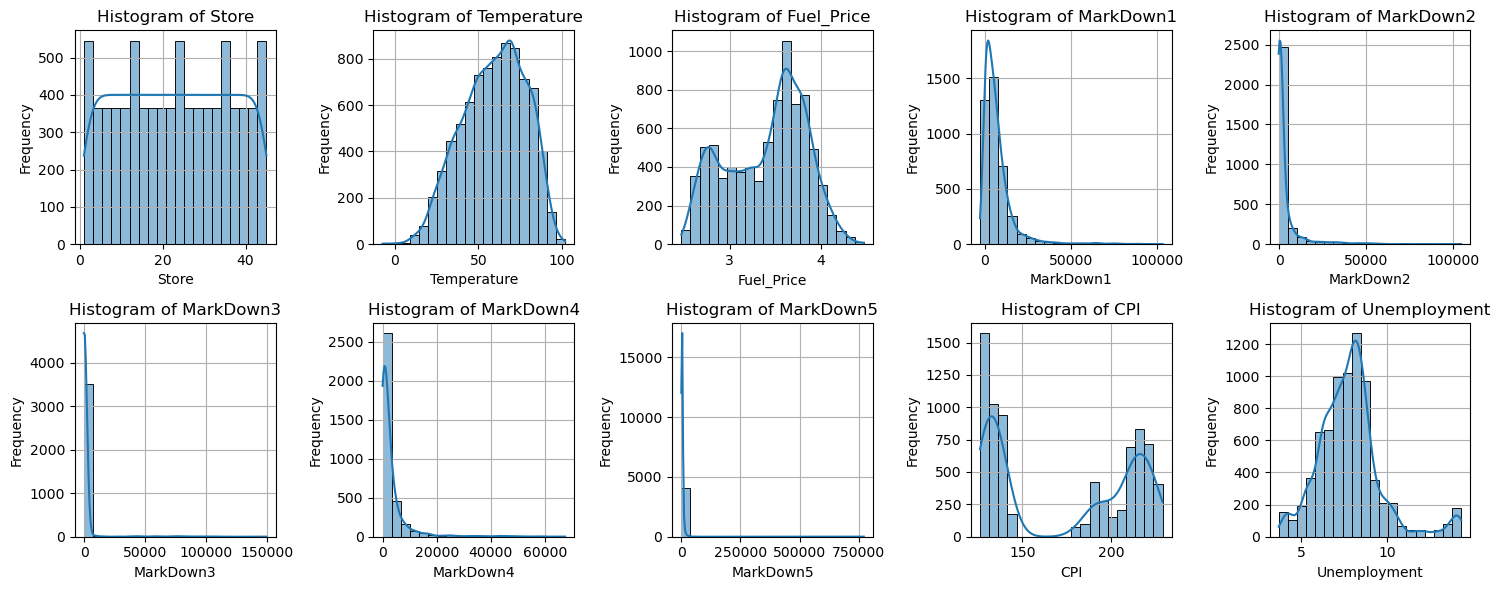

In [13]:
# Histogram for numeric columns in Features dataset

numeric_columns = features.select_dtypes(include=['int', 'float']).columns

# Defining the number of rows and columns in the grid
num_rows = 2
num_cols = len(numeric_columns) // num_rows

# Creating the histogram grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 6))

# Flattening the axes array for easy access
axes = axes.flatten()

# Iterating over numeric columns and plotting histograms
for i, column in enumerate(numeric_columns):
    sns.histplot(features[column].dropna(), bins=20, kde=True, ax=axes[i])
    axes[i].set_xlabel(column, fontsize=10)
    axes[i].set_ylabel('Frequency', fontsize=10)
    axes[i].set_title('Histogram of ' + column, fontsize=12)
    axes[i].grid(True)

# Adjusting layout and displaying histograms
plt.tight_layout()
plt.show()

In [14]:
# Store Types

type_counts = mg_train.Type.value_counts().to_dict()

df = pd.DataFrame(list(type_counts.items()), columns=['Store_Type', 'Counts'])

color_map = {'A': 'red', 'B': 'blue', 'C': 'green'}

fig = px.pie(df, values='Counts', names='Store_Type',
             title='Popularity of Store Types', labels='Store_Type',
             color='Store_Type', color_discrete_map=color_map)

fig.show()

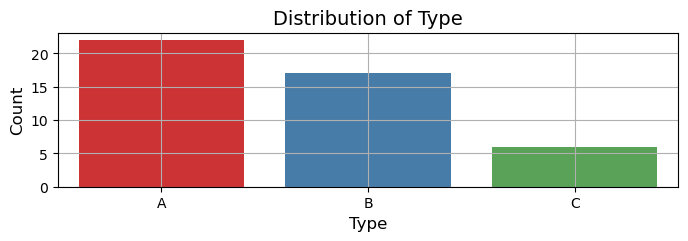

In [15]:
# Distribution of type in Stores dataset

for column in stores.columns:
    if stores[column].dtype == 'object':
        plt.figure(figsize=(8, 2))
        sns.countplot(data=stores, x=column, palette='Set1')
        plt.xlabel(column, fontsize=12)
        plt.ylabel('Count', fontsize=12)
        plt.title('Distribution of ' + column, fontsize=14)
        plt.xticks(rotation=0)
        plt.grid(True)
        plt.show()

In [16]:
# Average sales for each store

avg_weekly_sales = mg_train.groupby('Type')['Weekly_Sales'].mean().to_dict()

df = pd.DataFrame(list(avg_weekly_sales.items()), columns=['Store_Type', 'Average_Sales'])

fig1 = px.bar(df,
              x="Store_Type",
              y="Average_Sales",
              title="Average sales for each store",
              labels={'Store_Type': 'Store Type', 'Average_Sales': 'Average Sales'},
              color="Store_Type",
              color_discrete_sequence=px.colors.qualitative.Set1)
                  
fig1.show()

##### 'A' stores have the highest sales, so it seems to have a correlation between type and average sales.

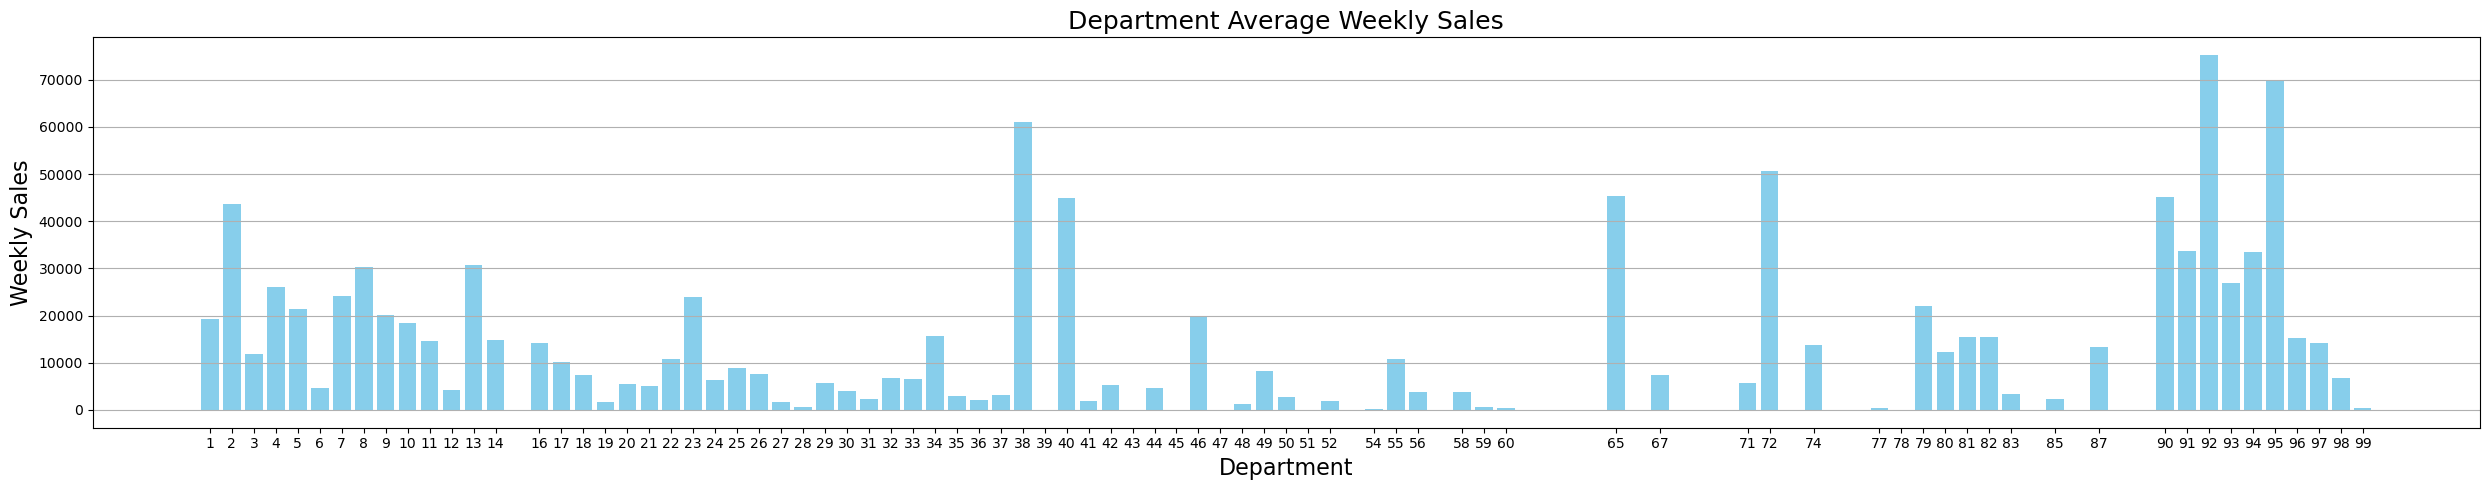

In [17]:
# Department average weekly sales

departament_sales = train.groupby(['Dept']).agg({'Weekly_Sales': ['mean', 'median']})

plt.figure(figsize=(25, 5))

plt.bar(departament_sales.index, departament_sales['Weekly_Sales']['mean'], color='skyblue')
plt.xticks(departament_sales.index, rotation=0)
plt.ylabel('Weekly Sales', fontsize=16)
plt.xlabel('Department', fontsize=16)
plt.title('Department Average Weekly Sales', fontsize=18)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

##### Department 92 has the highest sales, followed by 95.

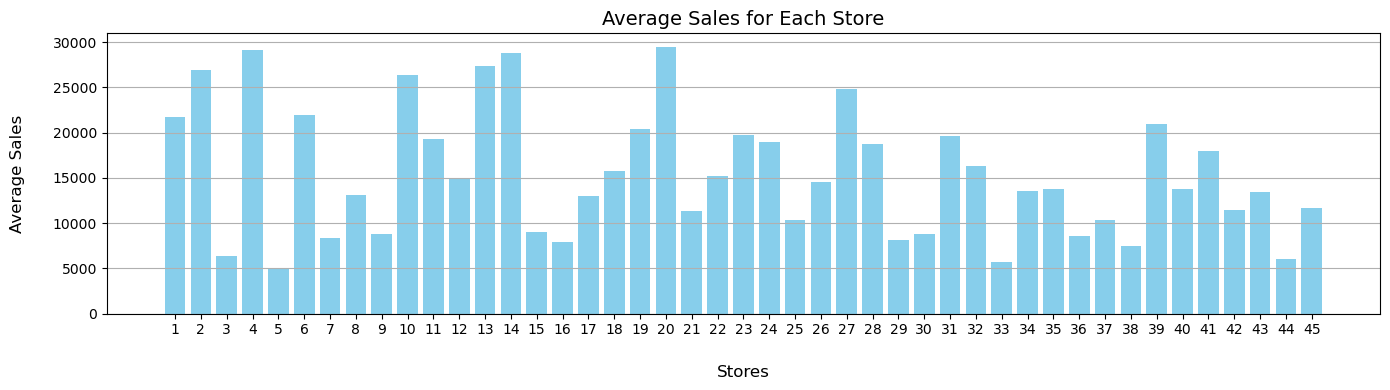

In [18]:
# Average sales for each store

store_sales = mg_train.groupby('Store')['Weekly_Sales'].mean().sort_values(ascending=True)
                                                                           
plt.figure(figsize=(14, 4))

plt.bar(store_sales.index, store_sales.values, color='skyblue')
plt.xlabel('Stores', fontsize=12, labelpad=20)
plt.ylabel('Average Sales', fontsize=12, labelpad=20)
plt.title('Average Sales for Each Store', fontsize=14)
plt.xticks(store_sales.index, rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

##### Stores 4, 14 and 20 have the highest average sales.

In [19]:
store_sales_2010 = mg_train[mg_train.Year==2010].groupby('Store')['Weekly_Sales'].mean().to_dict()
store_2010 = pd.DataFrame(list(store_sales_2010.items()), columns=['Store', 'Avg_Sales_2010'])

store_sales_2011 = mg_train[mg_train.Year==2011].groupby('Store')['Weekly_Sales'].mean().to_dict()
store_2011 = pd.DataFrame(list(store_sales_2011.items()), columns=['Store', 'Avg_Sales_2011'])

store_sales_2012 = mg_train[mg_train.Year==2012].groupby('Store')['Weekly_Sales'].mean().to_dict()
store_2012 = pd.DataFrame(list(store_sales_2012.items()), columns=['Store', 'Avg_Sales_2012'])

fig = make_subplots(rows=3, cols=1, subplot_titles=("Average Store Sales - 2010", "Average Store Sales - 2011", "Average Store Sales - 2012"))

fig.add_trace(go.Bar(x=store_2010.Store, y=store_2010.Avg_Sales_2010,),1, 1)

fig.add_trace(go.Bar(x=store_2011.Store, y=store_2011.Avg_Sales_2011,),2, 1)

fig.add_trace(go.Bar(x=store_2012.Store, y=store_2012.Avg_Sales_2012,),3, 1)

fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), showlegend=False, height=1500)

fig.update_xaxes(title_text="Store", row=1, col=1)
fig.update_xaxes(title_text="Store", row=2, col=1)
fig.update_xaxes(title_text="Store", row=3, col=1)

fig.update_yaxes(title_text="Average Sales", row=1, col=1)
fig.update_yaxes(title_text="Average Sales", row=2, col=1)
fig.update_yaxes(title_text="Average Sales", row=3, col=1)

fig.update_xaxes(tick0=1, dtick=1)
fig.show()

##### The trend remains the same over 3 years.

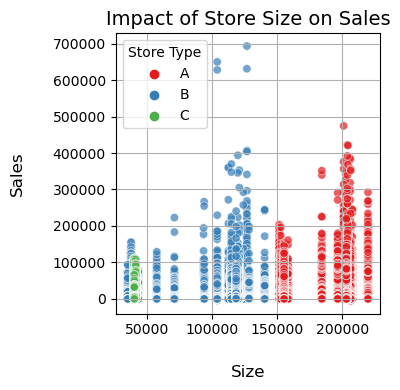

In [20]:
# Impact of size of store on sales

plt.figure(figsize=(4, 4))

sns.scatterplot(x=mg_train['Size'], y=mg_train['Weekly_Sales'], hue=mg_train['Type'], palette='Set1', alpha=0.7)

plt.xlabel('Size', fontsize=12, labelpad=20)
plt.ylabel('Sales', fontsize=12, labelpad=20)
plt.title('Impact of Store Size on Sales', fontsize=14)
plt.legend(title='Store Type', fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

##### It's possible to notice a linear relationship between size of a store and their sales, with some outliers in Type 'B'.

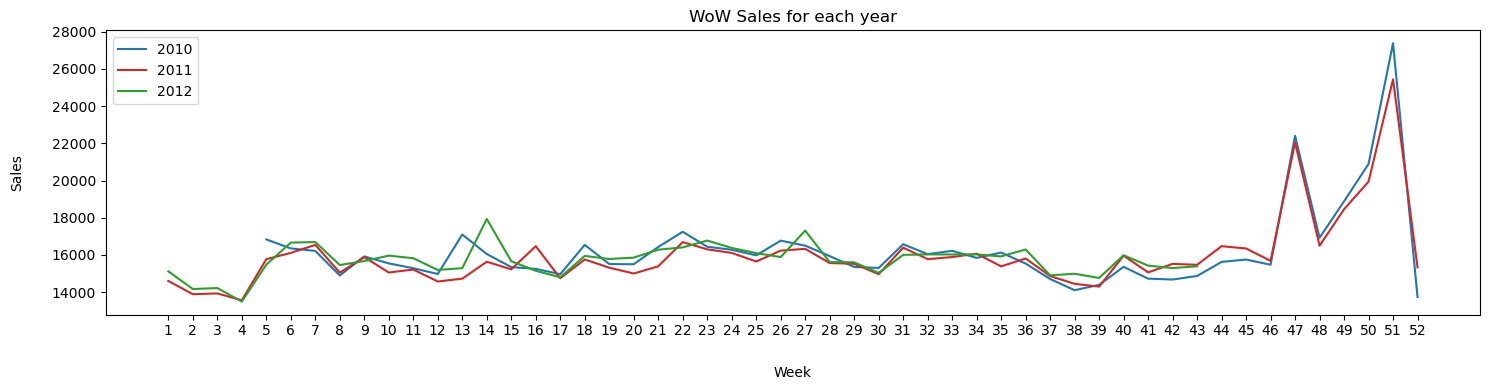

In [21]:
# Average week over week (WoW) sales

weekly_sales_2010 = mg_train[mg_train.Year == 2010].groupby('Week')['Weekly_Sales'].mean()
weekly_sales_2011 = mg_train[mg_train.Year == 2011].groupby('Week')['Weekly_Sales'].mean()
weekly_sales_2012 = mg_train[mg_train.Year == 2012].groupby('Week')['Weekly_Sales'].mean()

plt.figure(figsize=(15, 4))

plt.plot(weekly_sales_2010.index, weekly_sales_2010.values, color='tab:blue')
plt.plot(weekly_sales_2011.index, weekly_sales_2011.values, color='tab:red')
plt.plot(weekly_sales_2012.index, weekly_sales_2012.values, color='tab:green')

plt.xticks(np.arange(1, 53, step=1))
plt.xlabel('Week', fontsize=10, labelpad=20)
plt.ylabel('Sales', fontsize=10, labelpad=20)
plt.title("WoW Sales for each year")
plt.legend(['2010', '2011', '2012'])
plt.tight_layout()
plt.show()

###### There is an evident hike in sales after week 47, during the holiday season (Thanksgiving and Christmas).

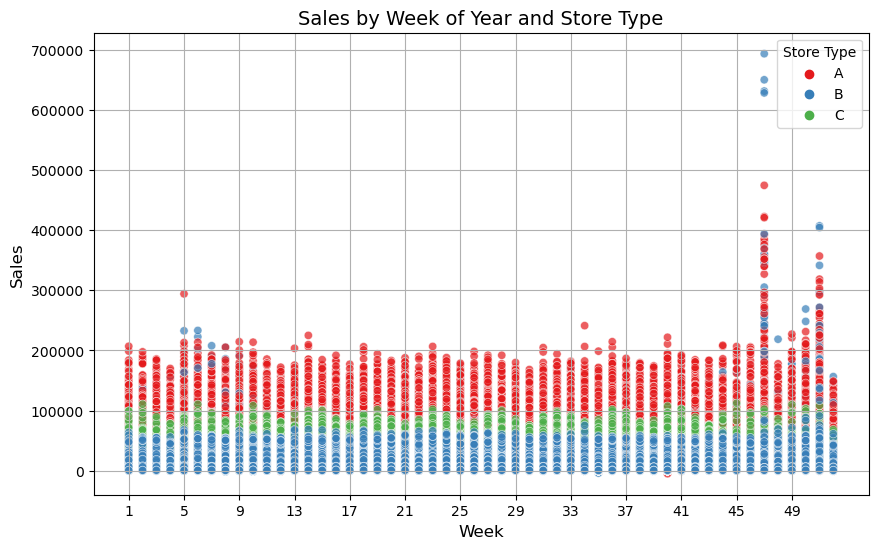

In [22]:
# Week of year sales by store type

plt.figure(figsize=(10, 6))

sns.scatterplot(x=mg_train['Week'], y=mg_train['Weekly_Sales'], hue=mg_train['Type'], palette='Set1', alpha=0.7)

plt.xticks(np.arange(1, 53, step=4))
plt.xlabel('Week', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.title('Sales by Week of Year and Store Type', fontsize=14)
plt.legend(title='Store Type', fontsize=10)
plt.grid(True)
plt.show()

##### The type C stores don't show a seasonal increase in sales at the end of the year.

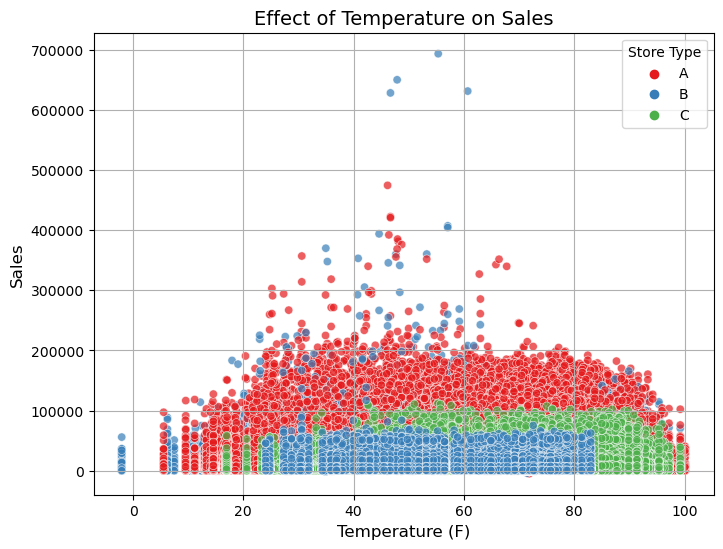

In [23]:
# Impact of temperature on sales

plt.figure(figsize=(8, 6))

sns.scatterplot(x=mg_train['Temperature'], y=mg_train['Weekly_Sales'], hue=mg_train['Type'], palette='Set1', alpha=0.7)

plt.xlabel('Temperature (F)', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.title('Effect of Temperature on Sales', fontsize=14)
plt.legend(title='Store Type', fontsize=10)
plt.grid(True)
plt.show()

##### Nice weather appears to promote increased sales, which are higher between 40 and 80 Fahrenheit.

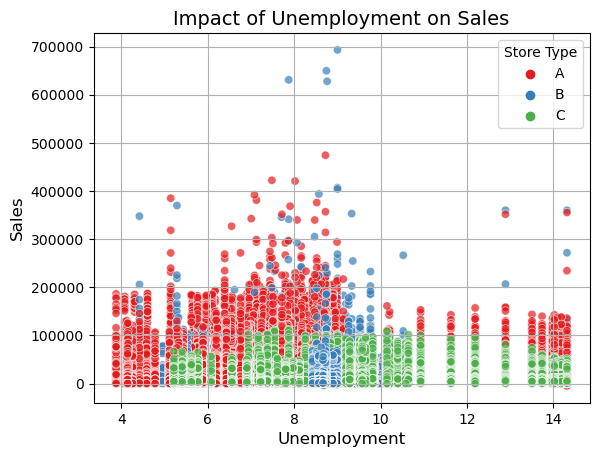

In [24]:
# Impact of Unemployment on Sales

sns.scatterplot(x=mg_train.Unemployment, y=mg_train.Weekly_Sales, hue=mg_train.Type, palette='Set1', alpha=0.7)
                
plt.xlabel('Unemployment', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.title('Impact of Unemployment on Sales', fontsize=14)
plt.legend(title='Store Type', fontsize=10)
plt.grid(True)
plt.show()

##### Sales at store 'C' don't seem to be affected by the unemployment index, while 'A' and 'B' perform better between 7 and 11.

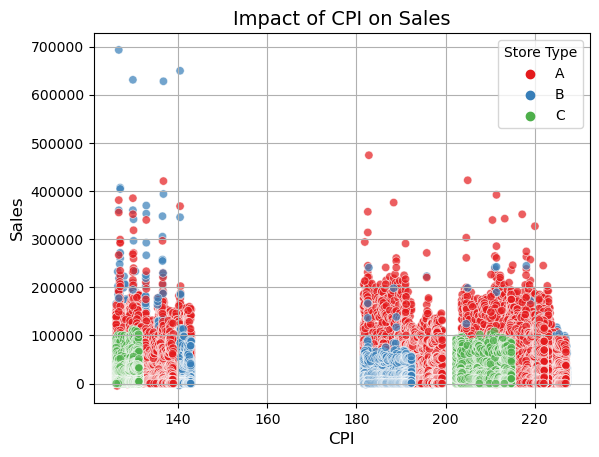

In [25]:
# Impact of CPI on Sales

sns.scatterplot(x=mg_train.CPI, y=mg_train.Weekly_Sales, hue=mg_train.Type, palette='Set1', alpha=0.7)
                
plt.xlabel('CPI', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.title('Impact of CPI on Sales', fontsize=14)
plt.legend(title='Store Type', fontsize=10)
plt.grid(True)
plt.show()

##### There seems to be no visible relationship between the change in CPI and weekly sales.

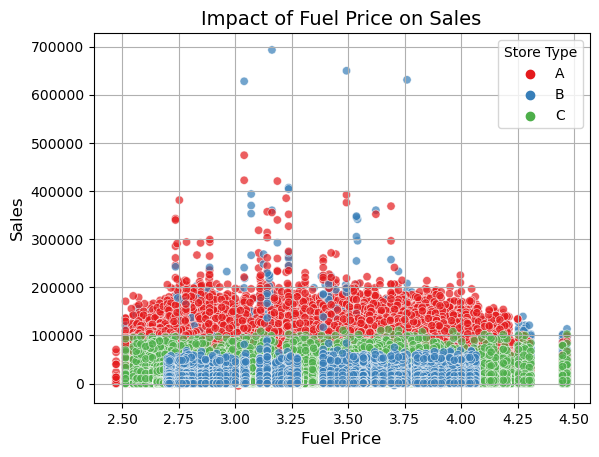

In [26]:
# Impact of Fuel Price on Sales

sns.scatterplot(x=mg_train.Fuel_Price, y=mg_train.Weekly_Sales, hue=mg_train.Type, palette='Set1', alpha=0.7)
                
plt.xlabel('Fuel Price', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.title('Impact of Fuel Price on Sales', fontsize=14)
plt.legend(title='Store Type', fontsize=10)
plt.grid(True)
plt.show()

##### For stores A and B, sales appear to decline after a fuel price above 4.25 dollars and are higher between 2.75 and 3.75. Store C seems to have a stable volume of sales even with fluctuating fuel prices.

In [27]:
holiday_sales = mg_train.groupby('IsHoliday')['Weekly_Sales'].mean()
holiday_days = mg_train.IsHoliday.value_counts()

fig = make_subplots(rows=1, cols=2, subplot_titles=["(Non)Holidays Sales", "(Non)Holidays Days"])
fig.add_trace(go.Bar(x=holiday_sales.index, y=holiday_sales.values, name="Mean Weekly Sales"), row=1, col=1)
fig.add_trace(go.Bar(x=holiday_days.index, y=holiday_days.values, name="Number of Days"), row=1, col=2)
fig.update_layout(title="Comparison of Sales and Number of Days for Holidays and Non-Holidays")
fig.show()

In [28]:
# Sales per Day for Holidays and Non-Holidays

sales_per_day = holiday_sales/holiday_days

fig = go.Figure(data=[go.Bar(x=sales_per_day.index, y=sales_per_day.values)])
fig.update_layout(title='Sales per Day for Holidays and Non-Holidays', xaxis_title='IsHoliday', yaxis_title='Sales per Day')
fig.show()

In [29]:
# Check for missing values in features

missing_values = features.isna().sum()
missing_values

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [30]:
# I'm going to drop those markdowns because they're missing values and they're difficult to read

drop_columns = ['MarkDown1', 'MarkDown2', 'MarkDown3','MarkDown4', 'MarkDown5']
mg_train = mg_train.drop(columns=drop_columns)
mg_test = mg_test.drop(columns=drop_columns)

C:\Users\andre\AppData\Local\Temp\ipykernel_6860\1257452735.py:10: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



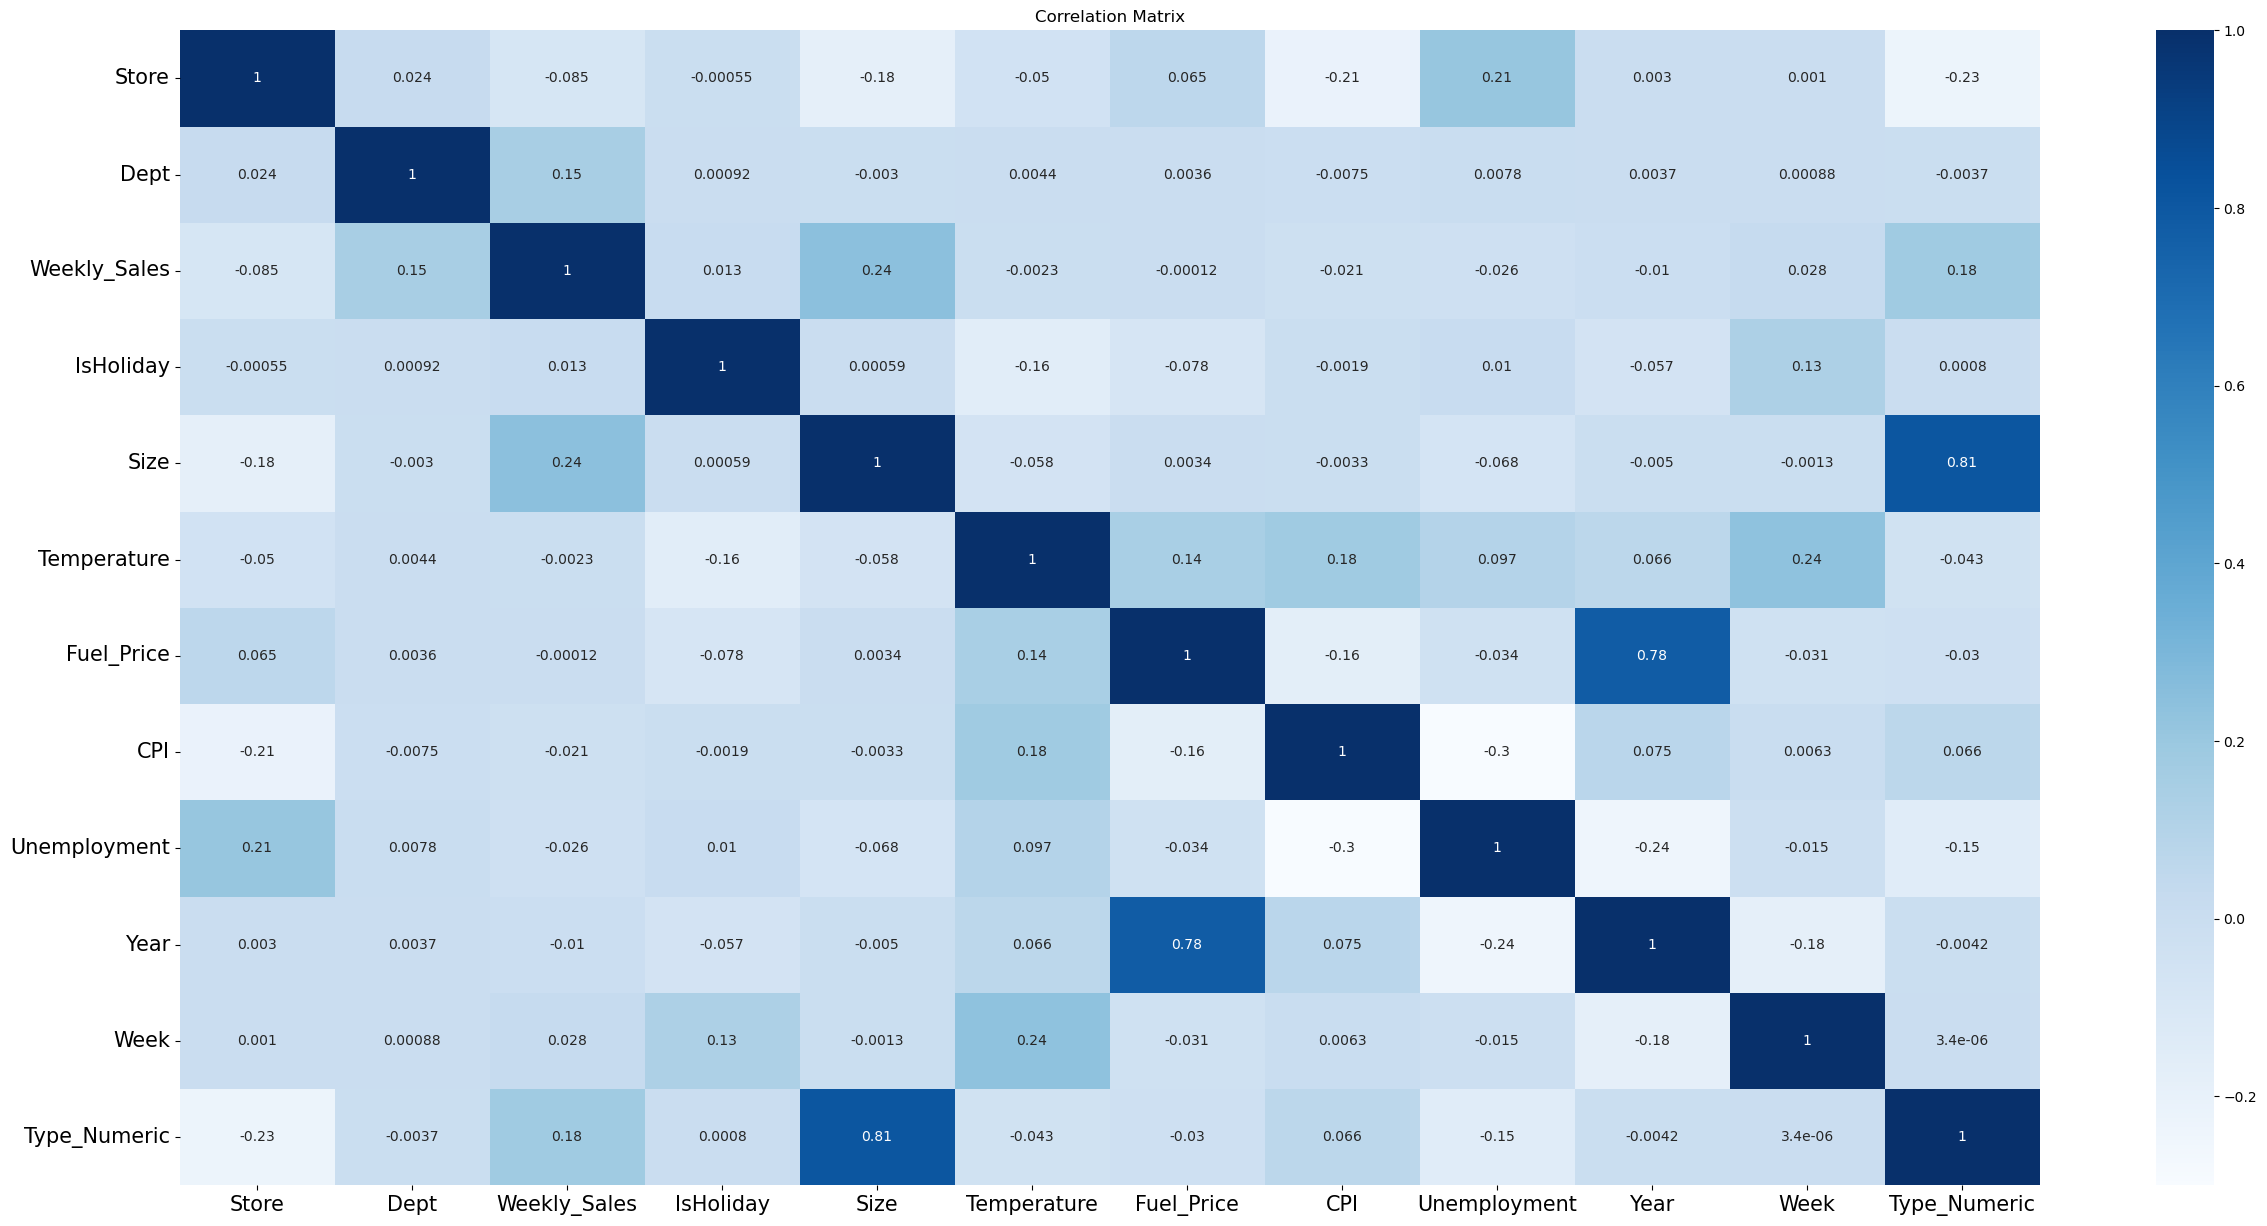

In [31]:
# Correlation Matrix

store_type_values = {'A': 3, 'B': 2, 'C': 1}
mg_train['Type_Numeric'] = mg_train.Type.map(store_type_values)
mg_test['Type_Numeric'] = mg_test.Type.map(store_type_values)

plt.figure(figsize=(30, 15))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
sns.heatmap(mg_train.corr(), cmap='Blues', annot=True, annot_kws={'size': 10})
plt.title('Correlation Matrix')
plt.show()

##### Weak correlation between Weekly Sales and Size, Type_Numeric and Dept

# 3.0 Data Cleaning

In [32]:
# I'm going to keep just Weekly Sales, IsHoliday, Size, Type_Numeric and Dept, because they seem important for modeling

drop_columns = ['Date', 'Temperature', 'Type', 'Fuel_Price', 'CPI', 'Unemployment', 'Year']
mg_train = mg_train.drop(columns=drop_columns)
mg_test = mg_test.drop(columns=drop_columns)

In [34]:
# Identifying the input and target column

input_column = mg_train.columns.to_list()
input_column.remove('Weekly_Sales')
target_column = 'Weekly_Sales'

inputs = mg_train[input_column].copy()
targets = mg_train[target_column].copy()

In [35]:
# Feature Scaling (Min Max Scaler)

minmax_scaler = MinMaxScaler().fit(mg_train[input_column])
inputs[input_column] = minmax_scaler.transform(inputs[input_column])
mg_test[input_column] = minmax_scaler.transform(mg_test[input_column])

In [36]:
# Training and validation

train_inputs, val_inputs, train_targets, val_targets = train_test_split(inputs, targets, test_size=0.3, random_state=42)

In [37]:
from IPython.display import Image

wmae = "https://i.imgur.com/BUgCnwu.png"
Image(url=wmae)

In [38]:
# Define WMAE function

def WMAE(df, targets, predictions):
    weights = df.IsHoliday.apply(lambda x: 10 if x else 1)
    return np.round(np.sum(weights*abs(targets-predictions))/(np.sum(weights)), 2)

# 4.0 Data Modeling

### 4.1 Linear Regression

In [39]:
# Create and train the model
model = LinearRegression().fit(train_inputs, train_targets)

# Generate predictions on training data
train_preds = model.predict(train_inputs)

# Compute WMAPE on training data
train_wmae = WMAE(train_inputs, train_targets, train_preds)
print('Training set WMAE loss: {}.'.format(train_wmae))

# Generate predictions on validation data
val_preds = model.predict(val_inputs)

# Compute WMAE on validation data
val_wmae = WMAE(val_inputs, val_targets, val_preds)
print('Validation set WMAE loss: {}.'.format(val_wmae))

Training set WMAE loss: 14938.49.
Validation set WMAE loss: 15119.36.


### 4.2 Ridge Regression

In [40]:
# Create and train the model
model_ridge = Ridge().fit(train_inputs, train_targets)

# Generate predictions on training data
train_preds = model_ridge.predict(train_inputs)

# Compute WMAE on training data
train_wmae = WMAE(train_inputs, train_targets, train_preds)
print('Training set WMAE loss: {}.'.format(train_wmae))

# Generate predictions on validation data
val_preds = model_ridge.predict(val_inputs)

# Compute WMAE on validation data
val_wmae = WMAE(val_inputs, val_targets, val_preds)
print('Validation set WMAE loss: {}.'.format(val_wmae))

Training set WMAE loss: 14938.46.
Validation set WMAE loss: 15119.34.


### 4.3 Decision Tree

In [41]:
tree = DecisionTreeRegressor()

tree.fit(train_inputs, train_targets)

tree_train_preds = tree.predict(train_inputs)

# Compute WMAE on training data
tree_train_wmae = WMAE(train_inputs, train_targets, tree_train_preds)
print('Training set WMAE loss: {}.'.format(tree_train_wmae))

# Compute WMAE on validation data
tree_val_preds = tree.predict(val_inputs)
tree_val_wmae = WMAE(val_inputs, val_targets, tree_val_preds)
print('Validation set WMAE loss: {}.'.format(tree_val_wmae))

Training set WMAE loss: 964.66.
Validation set WMAE loss: 2269.45.


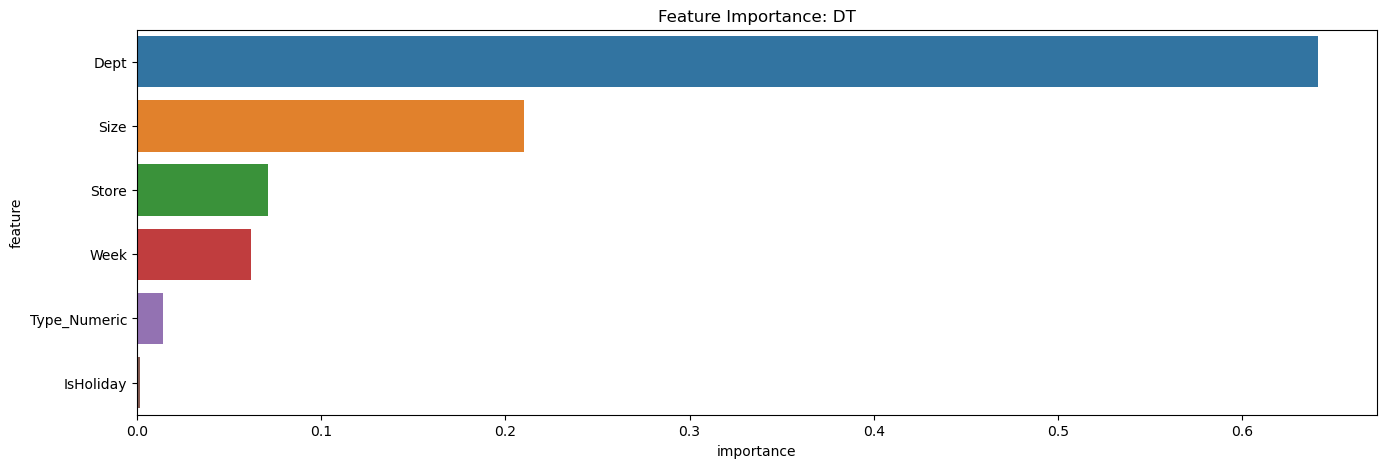

In [42]:
# DT: Feature Importance

feature_imp = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': tree.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(16,5))
plt.title('Feature Importance: DT')
sns.barplot(data=feature_imp, x='importance', y='feature')
plt.show()

##### Department, size and store are the major contributor features.

### 4.4 Random Forest

In [43]:
# Create the model
rf = RandomForestRegressor(n_jobs=-1, random_state=42)

# Fit the model
rf.fit(train_inputs, train_targets)

# Generate predictions on training data
rf_train_preds = rf.predict(train_inputs)

# Compute WMAE on training data
rf_train_wmae = WMAE(train_inputs, train_targets, rf_train_preds)
print('Training set WMAE loss: {}.'.format(rf_train_wmae))

# Generate predictions on validation data
rf_val_preds = rf.predict(val_inputs)

# Compute WMAE on validation data
rf_val_wmae = WMAE(val_inputs, val_targets, rf_val_preds)
print('Validation set WMAE loss: {}.'.format(rf_val_wmae))

Training set WMAE loss: 1148.8.
Validation set WMAE loss: 2066.78.


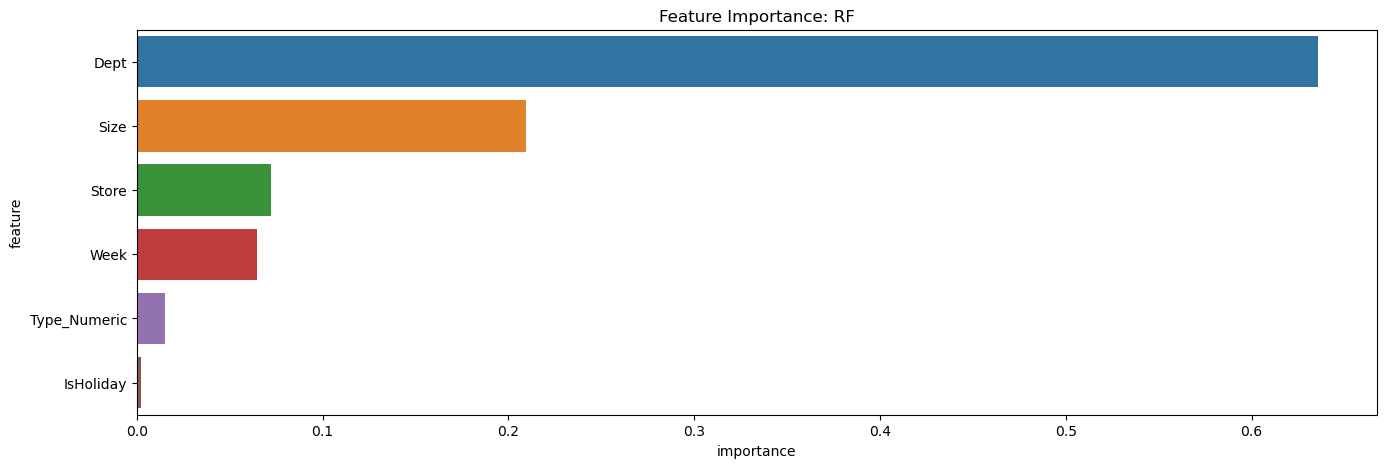

In [44]:
# RF: Feature Importance

feature_imp = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(16,5))
plt.title('Feature Importance: RF')
sns.barplot(data=feature_imp, x='importance', y='feature')
plt.show()

##### Department, size and store are the major contributor features.

### 4.4.1 Tuning Parameters

In [45]:
def test_params(**params):  
    model = RandomForestRegressor(random_state=42, n_jobs=-1, **params).fit(train_inputs, train_targets)
    train_wmae = WMAE(train_inputs, train_targets, model.predict(train_inputs))
    val_wmae = WMAE(val_inputs, val_targets, model.predict(val_inputs))
    return train_wmae, val_wmae

In [46]:
def test_params_and_plot(params_name, params_values):
    train_errors, val_errors = [], [] 
    for value in params_values:
        params = {params_name: value}
        train_wmae, val_wmae = test_params(**params)
        train_errors.append(train_wmae)
        val_errors.append(val_wmae)
    plt.figure(figsize=(16,8))
    plt.title('Overfitting curve: ' + params_name)
    plt.plot(params_values, train_errors, 'b-o')
    plt.plot(params_values, val_errors, 'r-o')
    plt.xlabel(params_name)
    plt.ylabel('WMAE')
    plt.legend(['Training', 'Validation'])

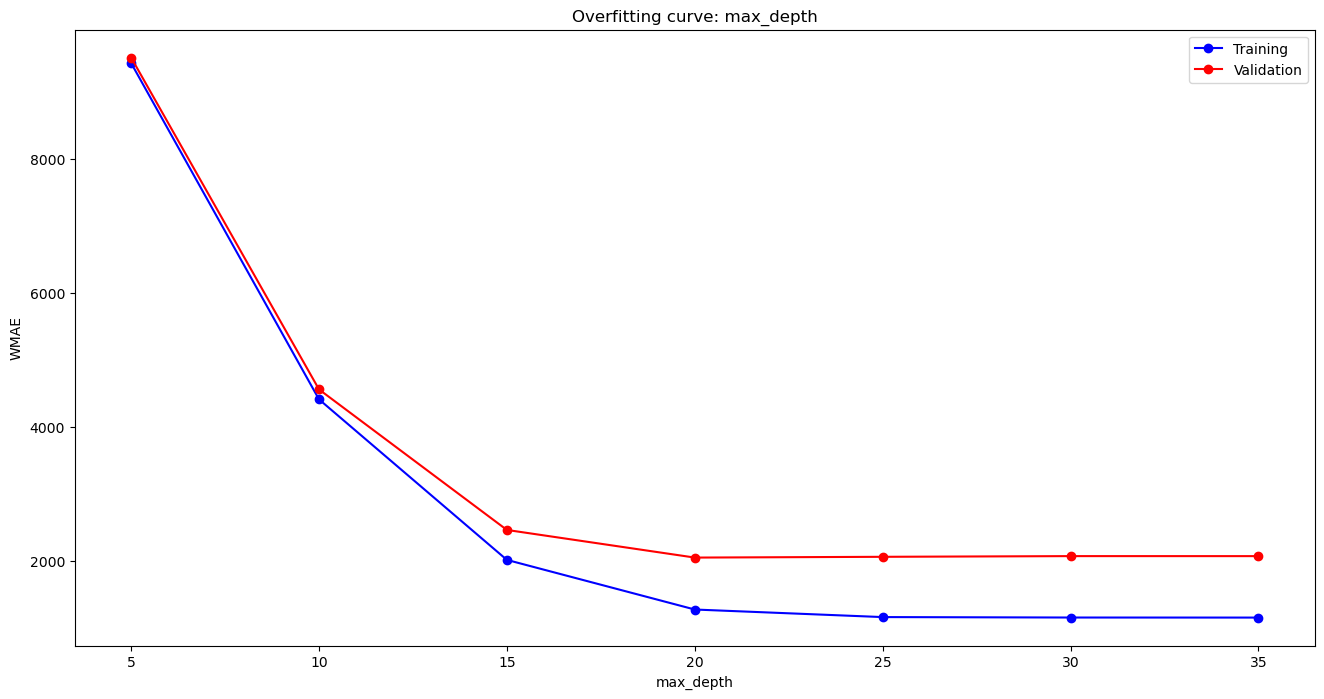

In [47]:
test_params_and_plot('max_depth', [5, 10, 15, 20, 25, 30, 35])

#### *Max. Depth*: 30

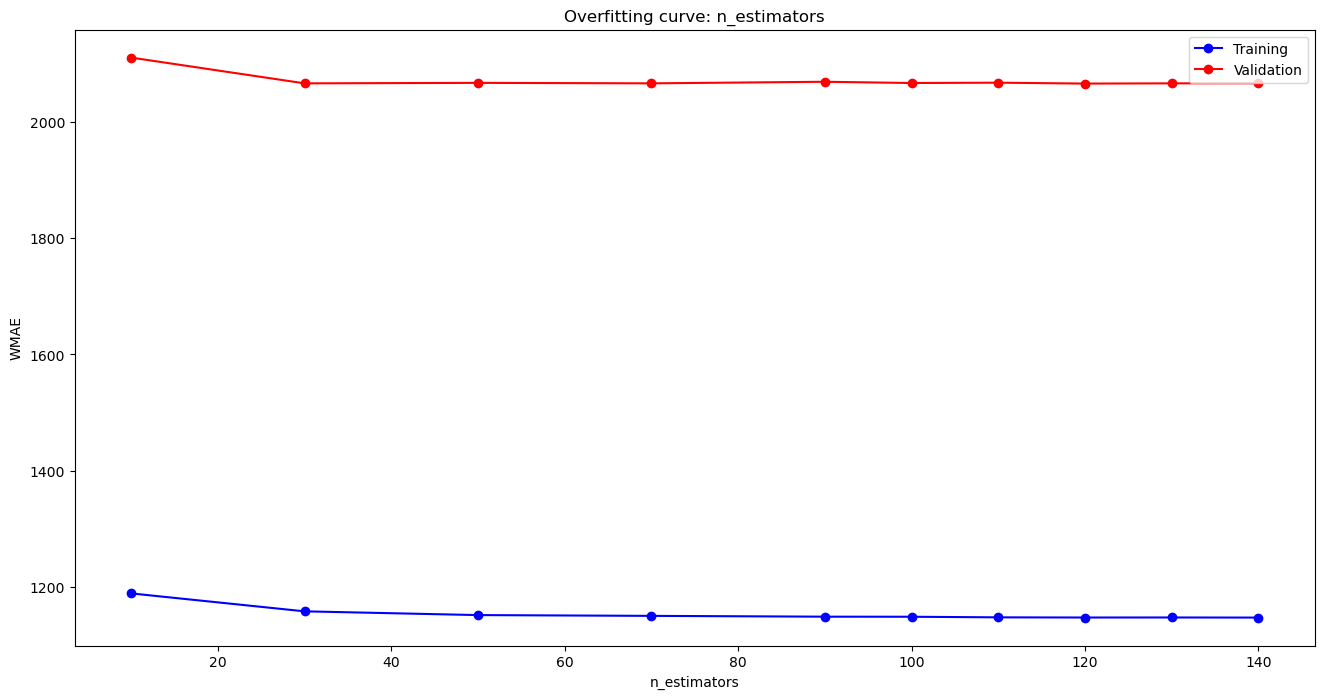

In [48]:
test_params_and_plot('n_estimators', [10, 30, 50, 70, 90, 100, 110, 120, 130, 140])

#### *Nº Estimators*: [100, 140]

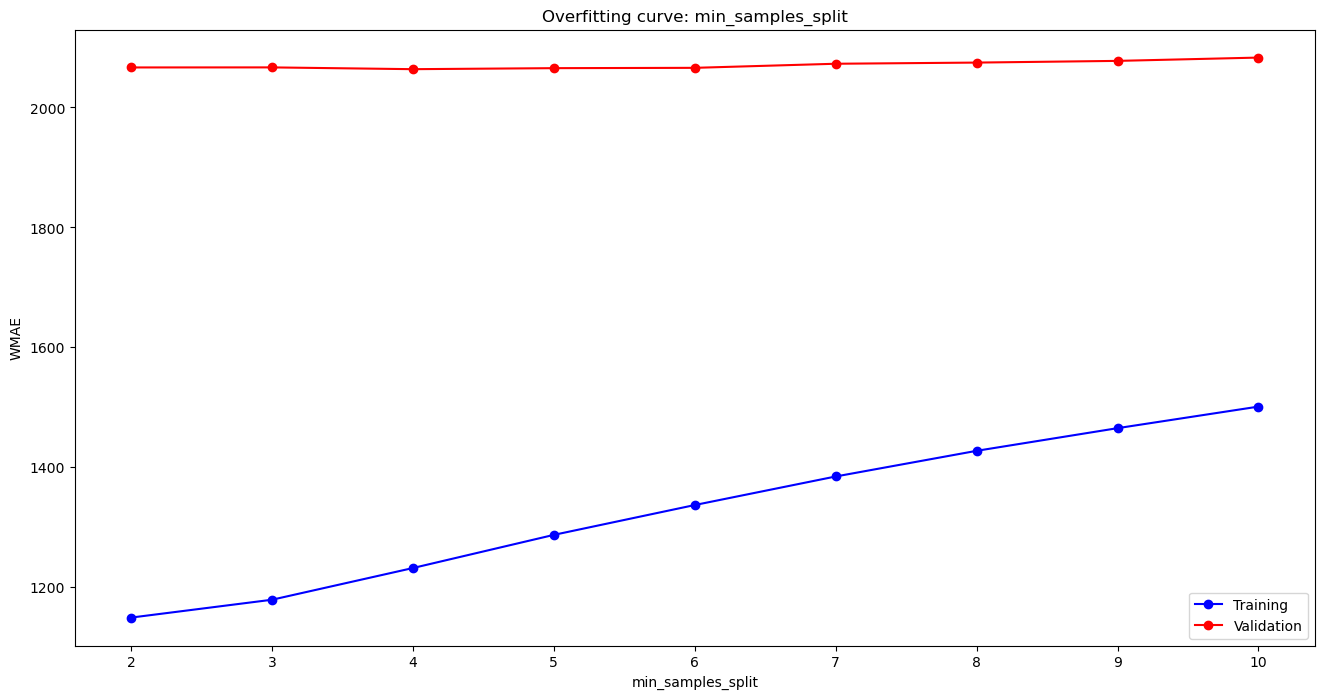

In [49]:
test_params_and_plot('min_samples_split', [2, 3, 4, 5, 6, 7, 8, 9, 10])

#### *Min. Samples Split*: 2

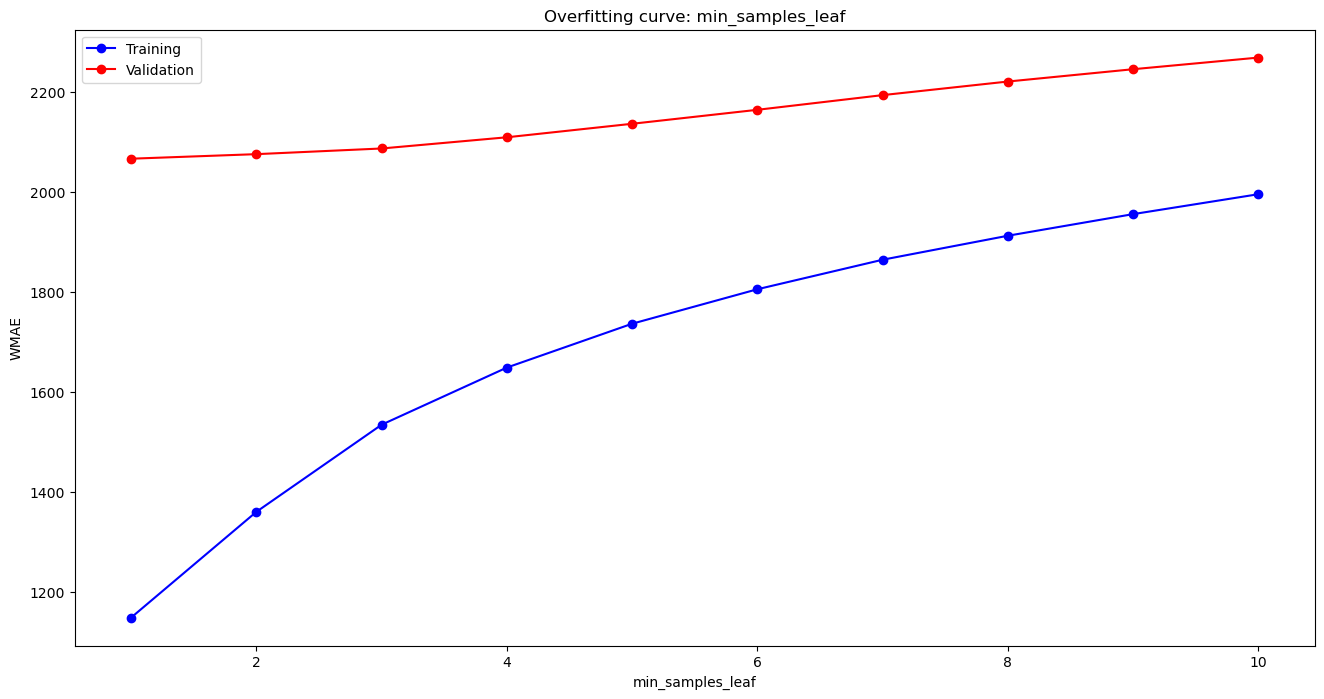

In [50]:
test_params_and_plot('min_samples_leaf', [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

#### *Min. Samples Leaf*: 1

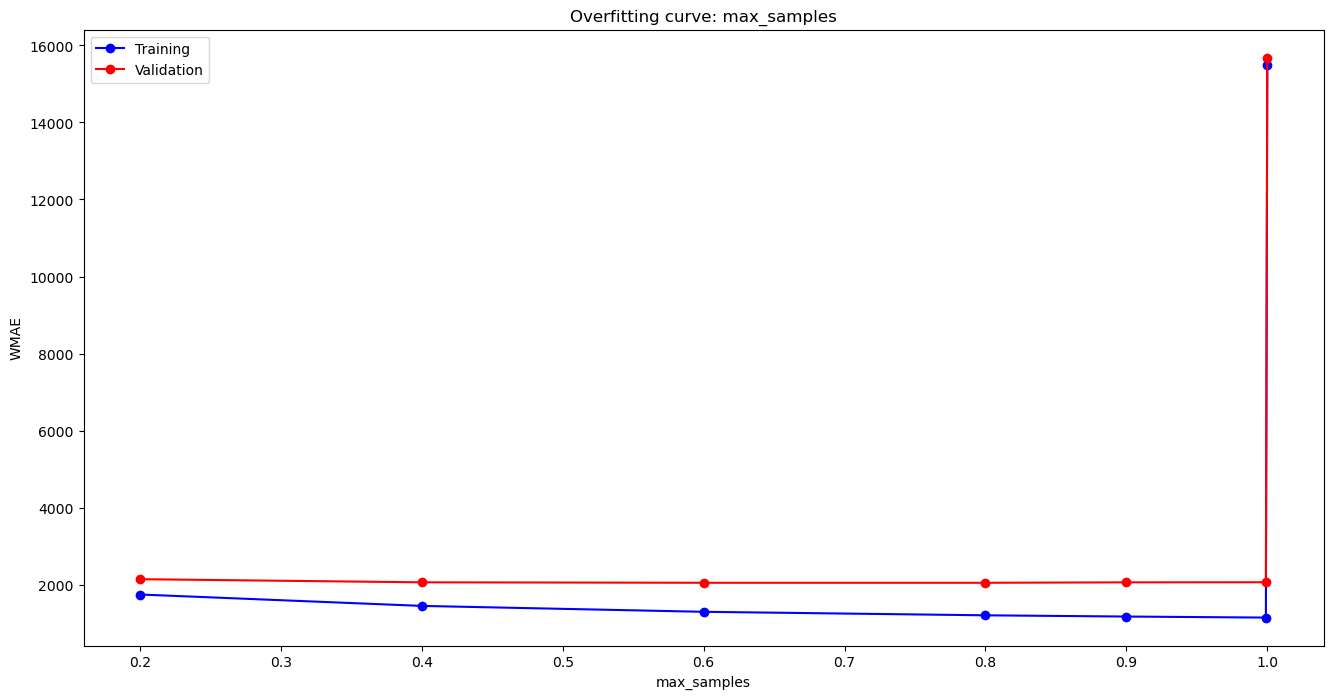

In [51]:
test_params_and_plot('max_samples', [0.2, 0.4, 0.6, 0.8, 0.9, 0.999, 1])

#### *Max. Samples*: 0.999

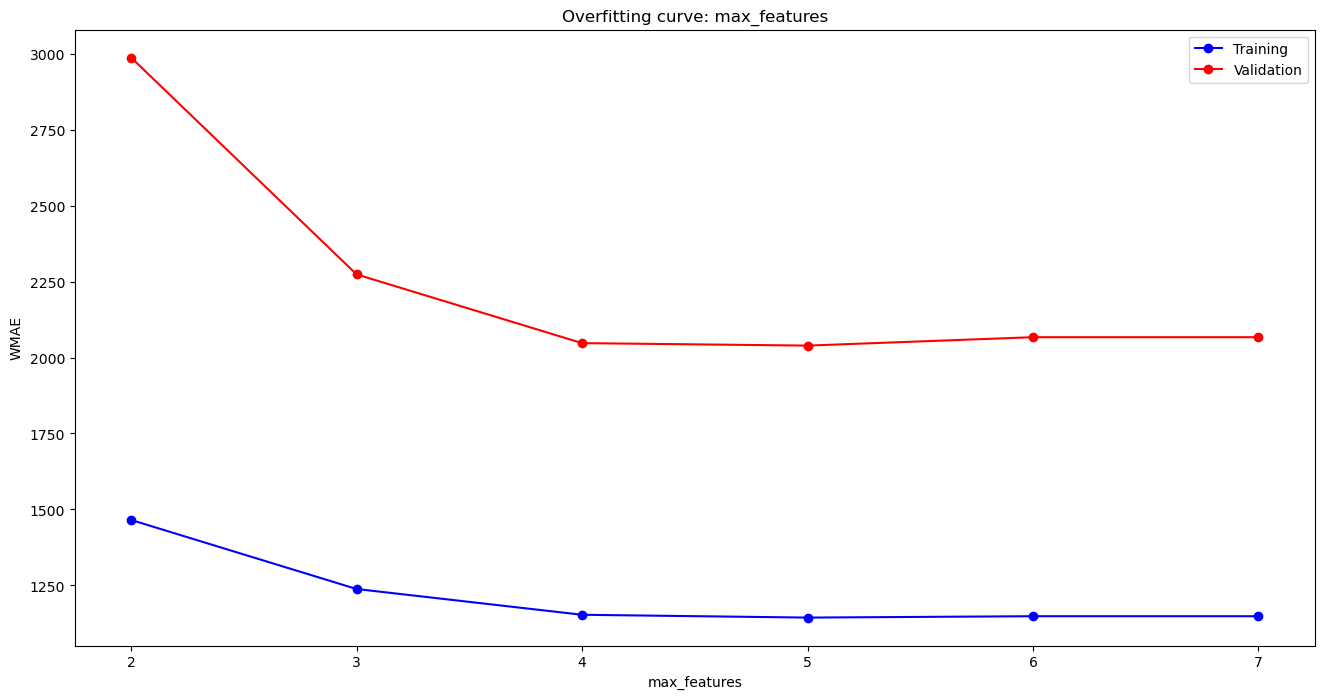

In [52]:
test_params_and_plot('max_features', [2, 3, 4, 5, 6, 7])

#### *Max. Features*: 6

In [53]:
# Create the model
rf = RandomForestRegressor(n_jobs=-1, max_depth=30, n_estimators=120, min_samples_split=2, 
                           min_samples_leaf=1, max_samples=0.999, max_features=6,  random_state=42)

# Fit the model
rf.fit(train_inputs, train_targets)

rf_train_preds = rf.predict(train_inputs)

# Compute WMAE on traing data
rf_train_wmae = WMAE(train_inputs, train_targets, rf_train_preds)
print('Training set WMAE loss: {}.'.format(rf_train_wmae))

rf_val_preds = rf.predict(val_inputs)

# Compute WMAE on validation data
rf_val_wmae = WMAE(val_inputs, val_targets, rf_val_preds)
print('Validation set WMAE loss: {}.'.format(rf_val_wmae))

Training set WMAE loss: 1148.38.
Validation set WMAE loss: 2067.36.


##### N_Estimators:
- 110: Training set WMAE loss: 1148.89. Validation set WMAE loss: 2068.39.
- 120: Training set WMAE loss: 1148.38. Validation set WMAE loss: 2067.36.
- 130: Training set WMAE loss: 1148.46. Validation set WMAE loss: 2067.82.

### 4.5 Gradient Boosting Machine

In [54]:
# Create the model
gbm = XGBRegressor(random_state=42, n_jobs=-1)

# Fit the model
gbm.fit(train_inputs, train_targets)

# Generate predictions on training data
gbm_train_preds = gbm.predict(train_inputs)

# Compute WMAE on training data
gbm_train_wmae = WMAE(train_inputs, train_targets, gbm_train_preds)
print('Training set WMAE loss: {}.'.format(gbm_train_wmae))

# Generate predictions on validation data
gbm_val_preds = gbm.predict(val_inputs)

# Compute WMAE on validation data
gbm_val_wmae = WMAE(val_inputs, val_targets, gbm_val_preds)
print('Validation set WMAE loss: {}.'.format(gbm_val_wmae))

Training set WMAE loss: 3034.39.
Validation set WMAE loss: 3140.08.


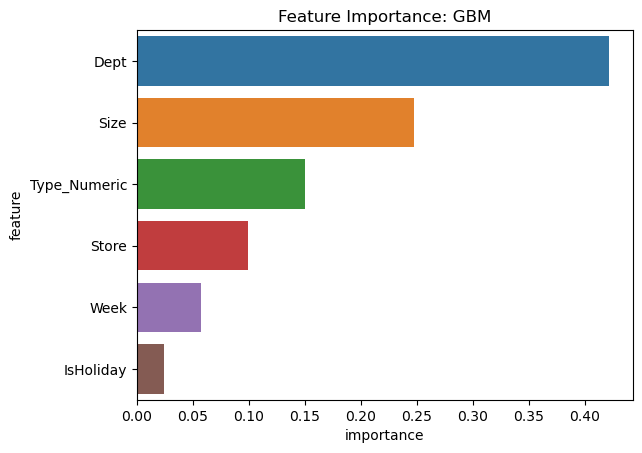

In [55]:
# GBM: Feature Importance

feature_imp = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': gbm.feature_importances_
}).sort_values('importance', ascending=False)

plt.title('Feature Importance: GBM')
sns.barplot(data=feature_imp, x='importance', y='feature')
plt.show()

##### Department, size and type are the major contributor features.

### 4.5.1 Tuning Parameters

In [56]:
def test_params_xgb(**params):  
    model = XGBRegressor(random_state=42, n_jobs=-1, **params).fit(train_inputs, train_targets)
    train_wmae = WMAE(train_inputs, train_targets, model.predict(train_inputs))
    val_wmae = WMAE(val_inputs, val_targets, model.predict(val_inputs))
    return train_wmae, val_wmae

In [57]:
def test_params_and_plot_xgb(params_name, params_values):
    train_errors, val_errors = [], [] 
    for value in params_values:
        params = {params_name: value}
        train_wmae, val_wmae = test_params_xgb(**params)
        train_errors.append(train_wmae)
        val_errors.append(val_wmae)
    plt.figure(figsize=(16,8))
    plt.title('Overfitting curve: ' + params_name)
    plt.plot(params_values, train_errors, 'b-o')
    plt.plot(params_values, val_errors, 'r-o')
    plt.xlabel(params_name)
    plt.ylabel('WMAE')
    plt.legend(['Training', 'Validation'])

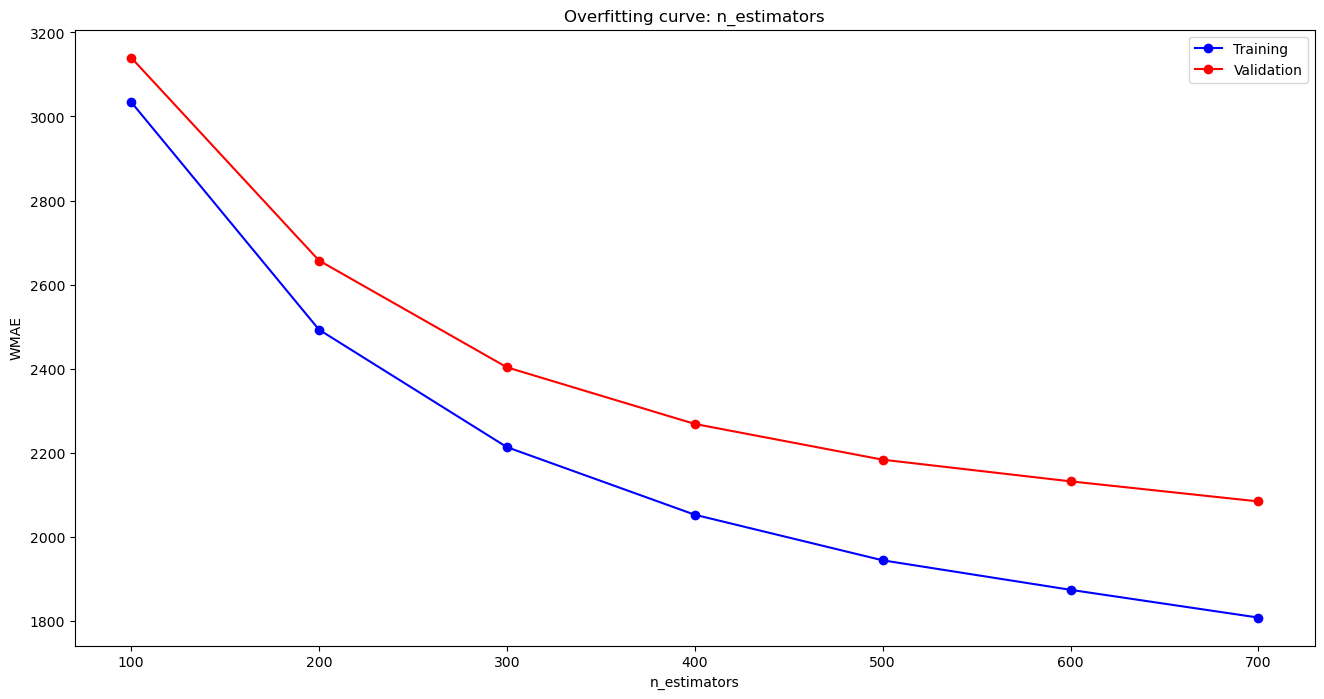

In [58]:
test_params_and_plot_xgb('n_estimators', [100, 200, 300, 400, 500, 600, 700])

#### *Nº Estimators*: 400

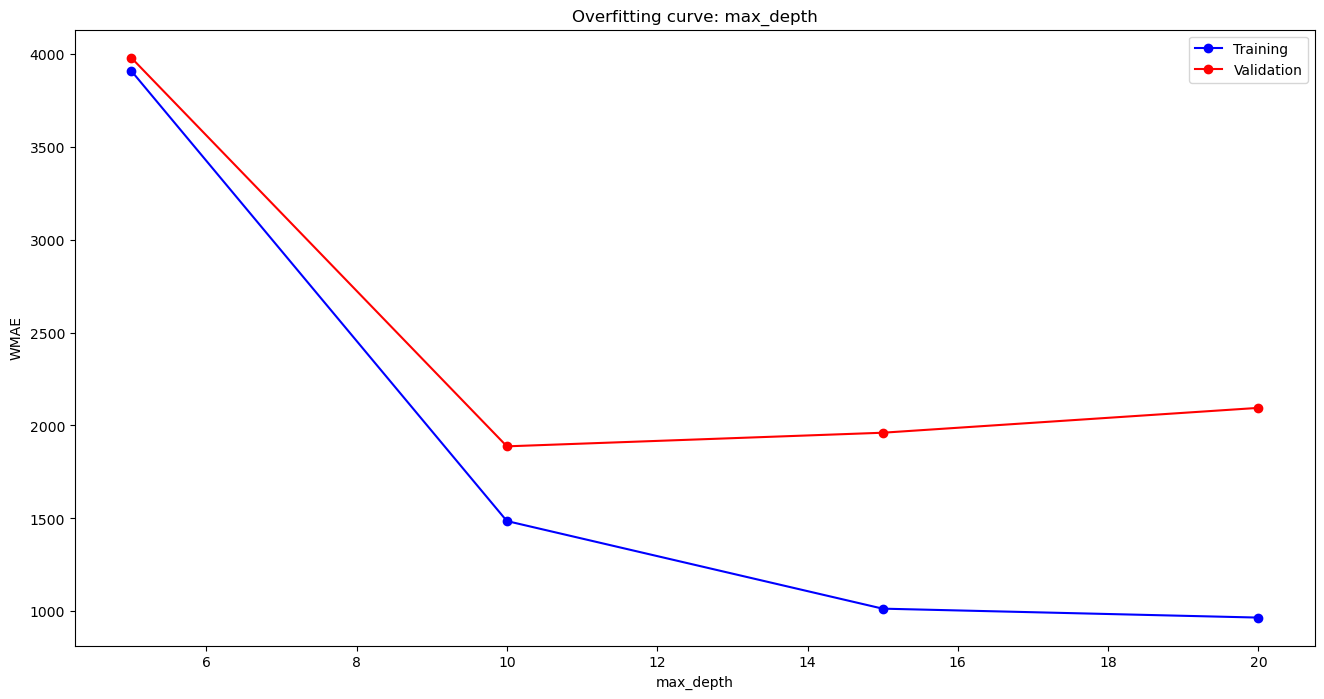

In [59]:
test_params_and_plot_xgb('max_depth', [5, 10, 15, 20])

#### *Max. Depth*: 15

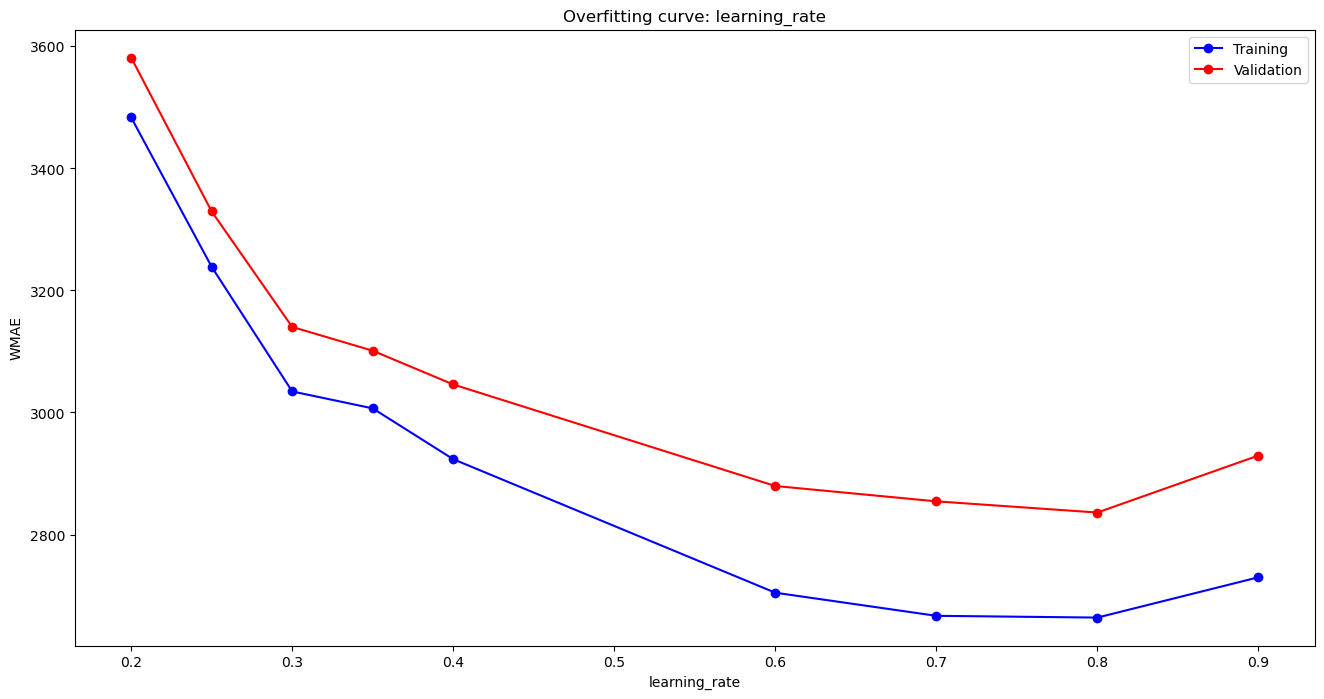

In [60]:
test_params_and_plot_xgb('learning_rate', [0.2, 0.25, 0.3, 0.35, 0.4, 0.6, 0.7, 0.8, 0.9])

#### *Leaning Rate*: [0.3, 0.4]

In [61]:
# Create the model
gbm = XGBRegressor(random_state=42, n_jobs=-1, n_estimators=400, max_depth=15, learning_rate=0.35)

# Fit the model
gbm.fit(train_inputs, train_targets)

gbm_train_preds = gbm.predict(train_inputs)

# Compute WMAE on traing data
gbm_train_wmae = WMAE(train_inputs, train_targets, gbm_train_preds)
print('Training set WMAE loss: {}.'.format(gbm_train_wmae))

gbm_val_preds = gbm.predict(val_inputs)

# Compute WMAE on validation data
gbm_val_wmae = WMAE(val_inputs, val_targets, gbm_val_preds)
print('Validation set WMAE loss: {}.'.format(gbm_val_wmae))

Training set WMAE loss: 965.46.
Validation set WMAE loss: 2054.62.


##### Learning Rate:
- 0.3: Training set WMAE loss: 966.37. Validation set WMAE loss: 2054.84.
- 0.35: Training set WMAE loss: 965.46. Validation set WMAE loss: 2054.62.
- 0.4: Training set WMAE loss: 965.0. Validation set WMAE loss: 2055.79.

### MODEL PERFORMANCE

#### *Linear Regression*:
    - Training set WMAE loss: 14938.49.
    - Validation set WMAE loss: 15119.36.
  
#### *Ridge Regression*:
    - Training set WMAE loss: 14938.46.
    - Validation set WMAE loss: 15119.34.
 
#### *Decision Tree*:
    - Training set WMAE loss: 964.66.
    - Validation set WMAE loss: 2272.46.

#### *Random Forest*:
    - Training set WMAE loss: 1148.38.
    - Validation set WMAE loss: 2067.36.

#### *Gradient Boosting Machine*:
    - Training set WMAE loss: 968.83. 
    - Validation set WMAE loss: 1978.04.

### 5.0 Predictions

In [62]:
predictions = gbm.predict(mg_test)

In [67]:
mg_test = test.merge(stores, how='left').merge(features, how='left')

def find_week(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df.Date.dt.year
    df['Week'] = (df.Date.dt.isocalendar().week) * 1.0

find_week(mg_test)

store_type_values = {'A': 3, 'B': 2, 'C': 1}
mg_test['Type_Numeric'] = mg_test.Type.map(store_type_values)

In [68]:
mg_test['Weekly_Sales'] = predictions

In [69]:
mg_test

Store  Dept       Date  IsHoliday Type    Size  Temperature  \
0           1     1 2012-11-02      False    A  151315        55.32   
1           1     1 2012-11-09      False    A  151315        61.24   
2           1     1 2012-11-16      False    A  151315        52.92   
3           1     1 2012-11-23       True    A  151315        56.23   
4           1     1 2012-11-30      False    A  151315        52.34   
...       ...   ...        ...        ...  ...     ...          ...   
115059     45    98 2013-06-28      False    B  118221        76.05   
115060     45    98 2013-07-05      False    B  118221        77.50   
115061     45    98 2013-07-12      False    B  118221        79.37   
115062     45    98 2013-07-19      False    B  118221        82.84   
115063     45    98 2013-07-26      False    B  118221        76.06   

        Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
0            3.386    6766.44    5147.70      50.82    3639.90    2737.42   
1            3.314   11421.32    3370.89      40.28    4646.79    6154.16   
2            3.252    9696.28     292.10     103.78    1133.15    6612.69   
3            3.211     883.59       4.17   74910.32     209.91     303.32   
4            3.207    2460.03        NaN    3838.35     150.57    6966.34   
...            ...        ...        ...        ...        ...        ...   
115059       3.639    4842.29     975.03       3.00    2449.97    3169.69   
115060       3.614    9090.48    2268.58     582.74    5797.47    1514.93   
115061       3.614    3789.94    1827.31      85.72     744.84    2150.36   
115062       3.737    2961.49    1047.07     204.19     363.00    1059.46   
115063       3.804     212.02     851.73       2.06      10.88    1864.57   

               CPI  Unemployment  Year  Week  Type_Numeric  Weekly_Sales  
0       223.462779         6.573  2012  44.0             3  34239.554688  
1       223.481307         6.573  2012  45.0             3  19118.902344  
2       223.512911         6.573  2012  46.0             3  19049.757812  
3       223.561947         6.573  2012  47.0             3  19865.757812  
4       223.610984         6.573  2012  48.0             3  23905.441406  
...            ...           ...   ...   ...           ...           ...  
115059         NaN           NaN  2013  26.0             2    848.033142  
115060         NaN           NaN  2013  27.0             2    840.366333  
115061         NaN           NaN  2013  28.0             2    864.233887  
115062         NaN           NaN  2013  29.0             2    489.673309  
115063         NaN           NaN  2013  30.0             2    628.486694  

[115064 rows x 19 columns]

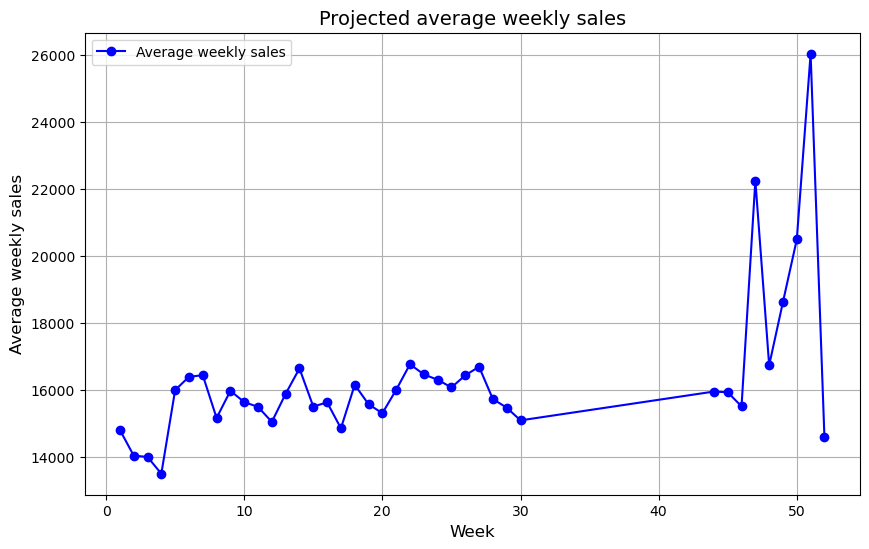

In [78]:
# Projected average weekly sales

weekly_sales_avg = mg_test.groupby('Week')['Weekly_Sales'].mean()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(weekly_sales_avg, marker='o', linestyle='-', color='b', label='Average weekly sales')
plt.xlabel('Week', fontsize=12)
plt.ylabel('Average weekly sales', fontsize=12)
plt.title('Projected average weekly sales', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True)
plt.show()

In [80]:
# Projected average weekly sales by store type

prj_avg_weekly_sales = mg_test.groupby('Type')['Weekly_Sales'].mean().to_dict()

df = pd.DataFrame(list(prj_avg_weekly_sales.items()), columns=['Store_Type', 'Average_Sales'])

fig2 = px.bar(df,
              x="Store_Type",
              y="Average_Sales",
              title="Projected average weekly sales by store type",
              labels={'Store_Type': 'Store type', 'Average_Sales': 'Average weekly sales'},
              color="Store_Type",
              color_discrete_sequence=px.colors.qualitative.Set1)
                  
fig2.show()

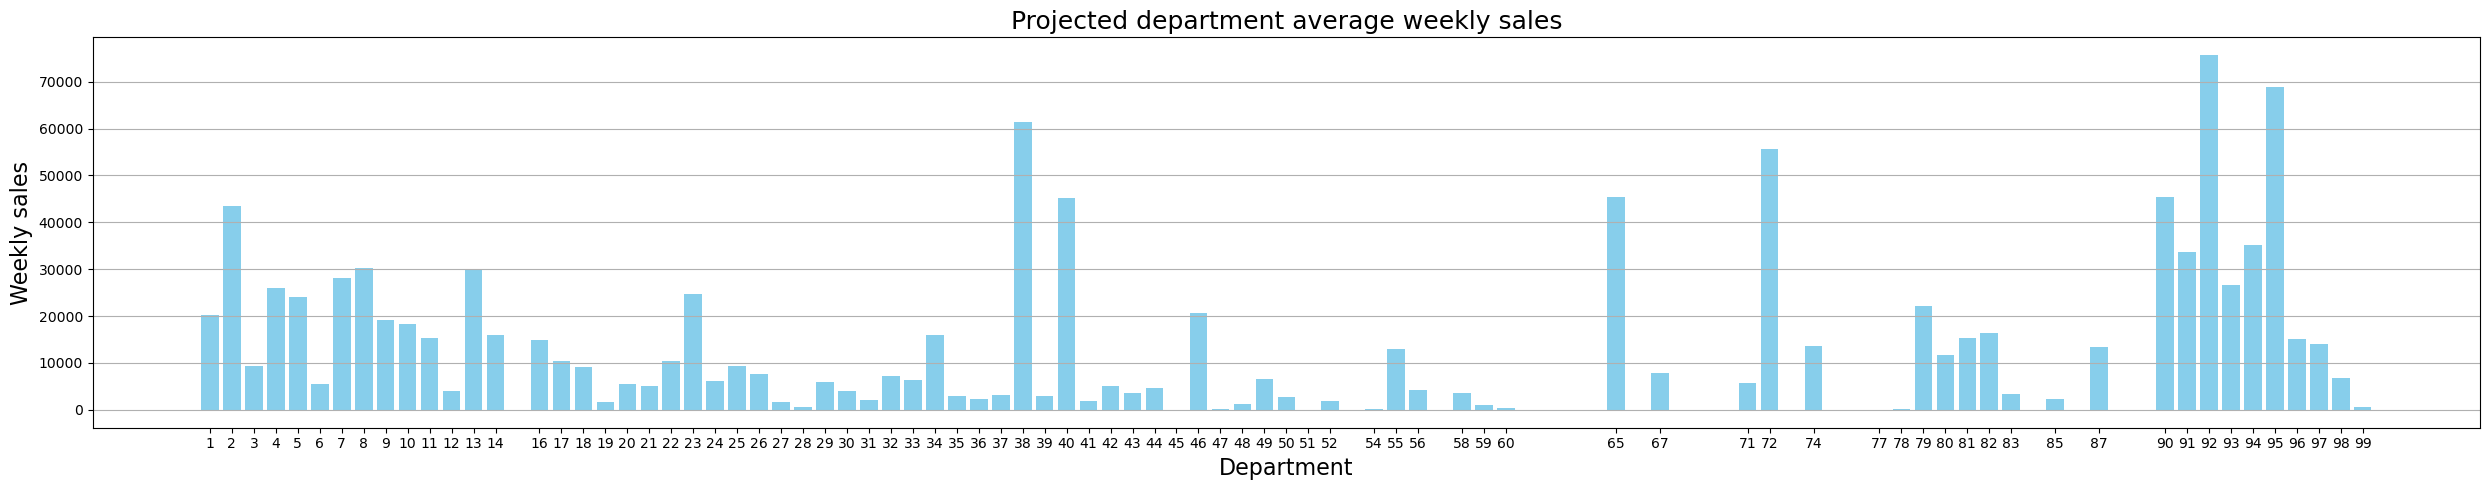

In [81]:
# Projected department average weekly sales

department_sales = mg_test.groupby('Dept')['Weekly_Sales'].mean()

# Plot
plt.figure(figsize=(25, 5))

plt.bar(department_sales.index, department_sales.values, color='skyblue')
plt.xticks(department_sales.index, rotation=0)
plt.ylabel('Weekly sales', fontsize=16)
plt.xlabel('Department', fontsize=16)
plt.title('Projected department average weekly sales', fontsize=18)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

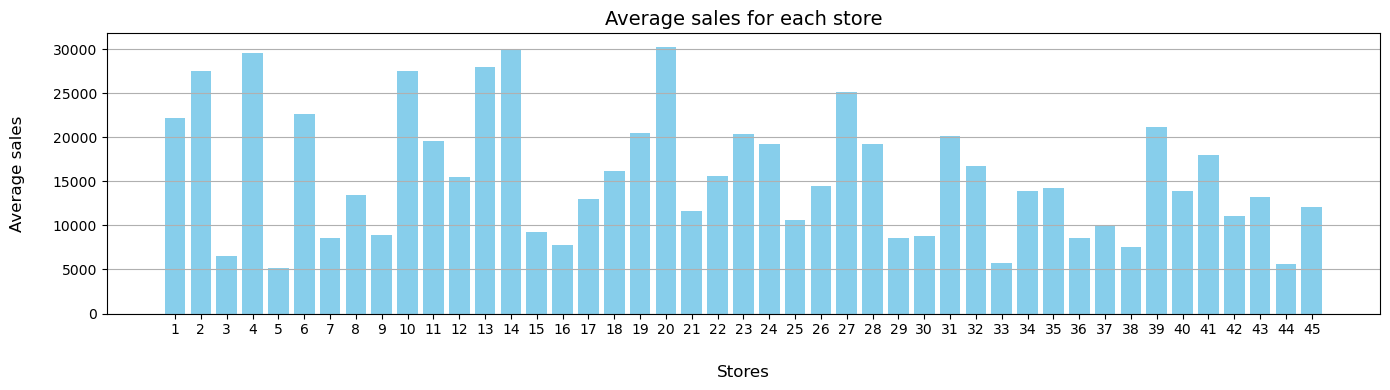

In [82]:
# Projected average sales for each store

prj_store_sales = mg_test.groupby('Store')['Weekly_Sales'].mean().sort_values(ascending=True)
                                                                           
plt.figure(figsize=(14, 4))

plt.bar(prj_store_sales.index, prj_store_sales.values, color='skyblue')
plt.xlabel('Stores', fontsize=12, labelpad=20)
plt.ylabel('Average sales', fontsize=12, labelpad=20)
plt.title('Average sales for each store', fontsize=14)
plt.xticks(store_sales.index, rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()